# Project: Wrangle and Analyze Data

## Introduction

goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

## Project Details

 - Data wrangling, which consists of:
   - Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
   - Assessing data
   - Cleaning data
 - Storing, analyzing, and visualizing your wrangled data
 - Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

In [1]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

import requests

## Gathering the Data:

### 1. WeRateDogs Twitter archive

In [2]:
df_1 = pd.read_csv('twitter-archive-enhanced-2.csv')

df_1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### 2. Tweet image predictions

In [3]:
# Download the image prediction file using the link provided to Udacity students
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
df_x = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(df_x.content)

335079

In [4]:
df_2 = pd.read_csv('image_predictions.tsv', sep = '\t')
df_2.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### 3. Twitter API for each tweet's JSON data
I couldn't create a Twitter account, so I choose 'Accessing Project Data Without a Twitter Account'

In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 834209720923721728
Fail
323: 8341

Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 798585098161549313
Fail
606: 798576900688019456
Fail
607: 7983

Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 759846353224826880
Fail
890: 759793422261743616
Fail
891: 7595

Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166: 722974582966214656
Fail
1167: 722613351520608256
Fail
1168:

Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440: 696894894812565505
Fail
1441: 696886256886657024
Fail
1442: 696877980375769088
Fail
1443:

Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715: 680440374763077632
Fail
1716: 680221482581123072
Fail
1717: 680206703334408192
Fail
1718:

Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989: 672834301050937345
Fail
1990: 672828477930868736
Fail
1991: 672640509974827008
Fail
1992:

Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261: 667550882905632768
Fail
2262: 667549055577362432
Fail
2263: 667546741521195010
Fail
2264: 667544320556335104
Fail
2265: 667538891197542400
Fail
2266:

In [6]:
df_list = []
with open('tweet-json.txt') as file:
    for line in file:
        data = json.loads(line)
        keys = data.keys()
        user = data.get('user')
        id_str = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        df_list.append({'id_str': id_str,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [7]:
df_3 = pd.DataFrame(df_list, columns = ['id_str', 'retweet_count', 'favorite_count'])

In [8]:
df_3.head(2)

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


In [9]:
df_3.tail(2)

,id_str,retweet_count,favorite_count
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


## Assessing the Data:
After gathering the data, check three tables and I looked for Unclean data in all the three tables about Quality and Tidiness issues.

### 1.  WeRateDogs Twitter archive

In [10]:
df_1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [11]:
df_1.count()

tweet_id                      2356
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2297
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64

- Unecessary category columns: doggo, floofer, pupper, puppo. Marged them into 1 colomn.

In [12]:
df_1.text.sample(10)

1182    This is Sadie. She is prepared for battle. 10/...
2119    Sharp dog here. Introverted. Loves purple. Not...
1761    Exotic pup here. Tail long af. Throat looks sw...
254     This is Charlie. He wants to know if you have ...
957     This is Max. She has one ear that's always sli...
580     Here's a very sleepy pupper. Appears to be por...
1313    Ever seen a dog pet another dog? Both 13/10 tr...
283     SHE MISPLACED HER HOOMAN 13/10 MISTAKES HAPPEN...
1753    Here's a pupper with some mean tan lines. Snaz...
400     This is Scooter. His lack of opposable thumbs ...
Name: text, dtype: object

In [13]:
# Check for retweets
df_1[df_1.retweeted_status_id.notnull()].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


- Remove 'retweets' and keepng only original tweets.

In [14]:
df_1.groupby('name')['name'].size()

name
Abby             2
Ace              1
Acro             1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            5
Alfy             1
Alice            2
Amber            1
Ambrose          1
Amy              1
Amélie           1
Anakin           2
Andru            1
Andy             1
Angel            1
Anna             1
Anthony          1
Antony           1
Apollo           1
                ..
Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old    

- Missing names in name column(eg : a, an, the...) - all are written with lower case letters

In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- 'tweet_id' column should be dtype object instead of int64.
- 'timestamp' colomn should be dtype datetime64  

In [16]:
df_1.source.sample(10)

2131    <a href="http://twitter.com/download/iphone" r...
619     <a href="http://twitter.com/download/iphone" r...
303     <a href="http://twitter.com/download/iphone" r...
2049    <a href="http://twitter.com/download/iphone" r...
1476    <a href="http://twitter.com/download/iphone" r...
1452    <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
1136    <a href="http://twitter.com/download/iphone" r...
983     <a href="http://twitter.com/download/iphone" r...
1314    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

- 'source' column is writen in html containg <a> tags

### 2. Tweet image predictions

In [17]:
df_2.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


- not-dog records in the dataset (eg : box_turtle, shopping_basket...)
- The types of dogs in columns 'p1', 'p2', and 'p3' have some uppercase and lowercase letters.

In [18]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


 - 'tweet_id' column should be dtype object instead of int64.

### 3. Twitter API for each tweet's JSON data

In [19]:
df_3.head()

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


- The column 'id_str' should be changed to 'tweet_id' so merging tables will be smoother.

In [20]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id_str            2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Assessing the Data - Summary
#### Quality 

WeRateDogs Twitter archive
- Remove 'retweets' and keepng only original tweets.
- Missing names in name column(eg : a, an, the...) - all are written with lower case letters
- 'tweet_id' column should be dtype object instead of int64.
- 'timestamp' colomn should be dtype datetime64
- 'source' column is writen in html containg <a> tags

Tweet image predictions
- not-dog records in the dataset (eg : box_turtle, shopping_basket...)
- The types of dogs in columns 'p1', 'p2', and 'p3' have some uppercase and lowercase letters.
- 'tweet_id' column should be dtype object instead of int64.

Twitter API for each tweet's JSON data
- The column 'id_str' should be changed to 'tweet_id' so merging tables will be smoother.

#### Tidiness
- Unecessary category columns: doggo, floofer, pupper, puppo. Marged them into 1 colomn.(WeRateDogs Twitter archive table)
- There are 3 tables instead of 1 master table
- 3 tables has 'tweet_id',so all tables can be merged into 1 table.


## Cleaning the Data:
Cleaning is the third step in the data wrangling process. And consist of 3 steps.
- Define
- Code
- Test


#### 1. Define:
- Remove 'retweets' and keepng only original tweets.
 - deleting all the retweets columns as we only need the original tweets.

#### 1. Code:

In [21]:
df_1 = df_1[df_1.retweeted_status_id.isnull()]

#### 1. Test:

In [22]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [23]:
df_1.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [24]:
df_1 = df_1.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [25]:
df_1.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


#### 2. Define:
- Missing names in name column(eg : a, an, the...) - all are written with lower case letters
 - Converted lower case letters  to 'None'

#### 2. Code:

In [26]:
df_1.name.value_counts()

None         680
a             55
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Tucker         9
Penny          9
Sadie          8
Lola           8
the            8
Winston        8
Daisy          7
Toby           7
Bella          6
Bo             6
Bailey         6
an             6
Jax            6
Koda           6
Oscar          6
Stanley        6
Leo            5
Chester        5
Buddy          5
Louis          5
Rusty          5
Scout          5
Bentley        5
Milo           5
            ... 
Lolo           1
Leela          1
Florence       1
Clarq          1
Grizzwald      1
Steve          1
Grey           1
Emma           1
Mike           1
Lacy           1
Sky            1
Aja            1
Linus          1
Ivar           1
Harry          1
Mutt           1
Cheesy         1
Batdog         1
Amélie         1
Harlso         1
Willem         1
Hercules       1
Biden          1
Burt           1
Farfle         1
Emmy           1
Hamrick        1
Jeb           

In [27]:
lowers = df_1.name.str.islower()
df_1.loc[lowers,'name'] = 'None'

#### 2. Test:

In [28]:
df_1.name.value_counts()

None        784
Lucy         11
Charlie      11
Oliver       10
Cooper       10
Tucker        9
Penny         9
Sadie         8
Lola          8
Winston       8
Toby          7
Daisy         7
Koda          6
Jax           6
Bo            6
Bella         6
Oscar         6
Bailey        6
Stanley       6
Milo          5
Leo           5
Scout         5
Buddy         5
Louis         5
Bentley       5
Rusty         5
Chester       5
Dave          5
Maggie        4
Chip          4
           ... 
Pipsy         1
Pubert        1
Murphy        1
Leela         1
Newt          1
Emma          1
Tuco          1
Jeb           1
Mutt          1
Grey          1
Mike          1
Lacy          1
Sky           1
Tilly         1
Aja           1
Linus         1
Ivar          1
Harry         1
Cheesy        1
Hamrick       1
Batdog        1
Amélie        1
Harlso        1
Willem        1
Hercules      1
Biden         1
Burt          1
Farfle        1
Emmy          1
Beebop        1
Name: name, Length: 931,

#### 3. Define:
- 'tweet_id' column should be dtype object instead of int64.

#### 3. Code:

In [29]:
df_1['tweet_id'] = df_1['tweet_id'].astype('str')

#### 3. Test:

In [30]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 254.9+ KB


#### 4. Define:
- 'timestamp' colomn should be dtype datetime64

#### 4. Code:

In [31]:
df_1['timestamp'] = pd.to_datetime(df_1['timestamp'])

#### 4. Test:

In [32]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 254.9+ KB


#### 5. Define:
- 'source' column is writen in html containg <a> tags

#### 5. Code:

In [33]:
df_1.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [34]:
def fix_source(i):
    x = i.find('>') + 1
    y = i[x:].find('<') 
    return i[x:][:y]

In [35]:
df_1.source = df_1.source.apply(lambda x: fix_source(x))

#### 5. Test:

In [36]:
df_1.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### 6. Define:
- The types of dogs in columns 'p1', 'p2', and 'p3' have some uppercase and lowercase letters.

#### 6. Code:

In [37]:
df_2['p1'] = df_2['p1'].str.lower()
df_2['p2'] = df_2['p2'].str.lower()
df_2['p3'] = df_2['p3'].str.lower()

#### 6. Test:

In [38]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### 7. Define:
- 'tweet_id' column should be dtype object instead of int64.

#### 7. Code:

In [39]:
df_2['tweet_id'] = df_2['tweet_id'].astype('str')

#### 7. Test:

In [40]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### 8. Define:
- The column 'id_str' should be changed to 'tweet_id' so merging tables will be smoother.

#### 8. Code:

In [41]:
df_3.rename(index=str, columns={"id_str": "tweet_id"}, inplace=True)

#### 8. Test:

In [42]:
df_3.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


#### 9. Define:
- Unecessary category columns: doggo, floofer, pupper, puppo. Marged them into 1 colomn.(WeRateDogs Twitter archive table)

#### 9. Code:

In [43]:
columns_melt = df_1.loc[ :, 'doggo' : 'puppo']
columns_remain = df_1.loc[:, 'tweet_id': 'name']

df_1 = pd.melt(df_1, id_vars = columns_remain, value_vars = columns_melt, 
                         var_name = 'stages', value_name = 'dog_stage')

In [44]:
df_1 = df_1.drop('stages', axis = 1)

In [45]:
df_1.duplicated(subset = "tweet_id").sum()

6525

In [46]:
df_1 = df_1.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

#### 9. Test:

In [47]:
df_1.dog_stage.value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_stage, dtype: int64

#### 10. Define:
- There are 3 tables instead of 1 master table
- 3 tables has 'tweet_id',so all tables can be merged into 1 table.

#### 10. Code:

In [48]:
df_merge1 = df_1.join(df_2.set_index('tweet_id'), on='tweet_id')

In [49]:
df_merge2 = df_merge1.join(df_3.set_index('tweet_id'), on='tweet_id')

In [50]:
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2095 to 7298
Data columns (total 24 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                2175 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null object
p3       

 ## Storing the Data:
 Clean DataFrame in a csv file with the main one named 'twitter_archive_master.csv'.

In [51]:
df_merge2.to_csv('twitter_archive_master.csv')

 ## Analyzing, and Visualizing the Data:

In [52]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [53]:
df_master.head()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,2095,667443425659232256,NaN,NaN,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,...,0.980815,False,drake,0.006918,False,hen,0.005255,False,620,833
1,2094,667453023279554560,NaN,NaN,2015-11-19 21:22:56,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,...,0.825670,True,french_bulldog,0.056639,True,staffordshire_bullterrier,0.054018,True,96,327
2,2093,667455448082227200,NaN,NaN,2015-11-19 21:32:34,Twitter Web Client,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,...,0.676376,True,irish_terrier,0.054933,True,yorkshire_terrier,0.040576,True,66,203
3,2092,667470559035432960,NaN,NaN,2015-11-19 22:32:36,Twitter Web Client,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,...,0.304175,True,pug,0.223427,True,lakeland_terrier,0.073316,True,102,273
4,2091,667491009379606528,NaN,NaN,2015-11-19 23:53:52,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,10,...,0.852088,True,ice_bear,0.132264,False,weasel,0.005730,False,242,559


 ### 1. The most popular dog name

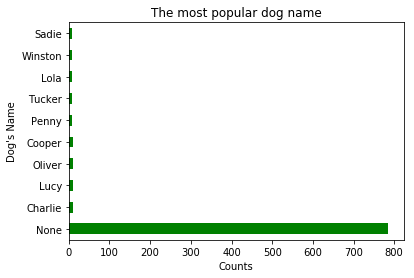

In [54]:
df_master.name.value_counts().sort_values(ascending = False)[:10].plot(kind ='barh', color = 'green')
plt.title('The most popular dog name')
plt.xlabel('Counts')
plt.ylabel("Dog's Name");

In [55]:
df_master.name.value_counts().head(10)

None       784
Charlie     11
Lucy        11
Oliver      10
Cooper      10
Penny        9
Tucker       9
Lola         8
Winston      8
Sadie        8
Name: name, dtype: int64

- The four most popular dog names are: (without 'None')
 - Lucy - 11
 - Charlie - 11
 - Oliver - 10
 - Cooper - 10

 ### 2.  The most source used by followers

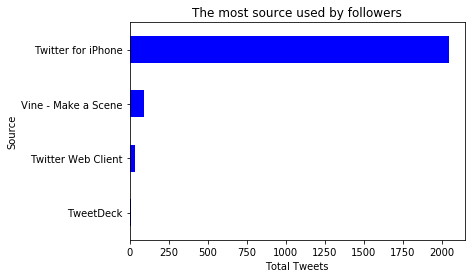

In [56]:
df_master.source.value_counts().sort_values().plot(kind ='barh', color = 'blue')
plt.title('The most source used by followers')
plt.xlabel('Total Tweets')
plt.ylabel('Source');

In [57]:
df_master.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [58]:
df_master.source.value_counts() / df_master.source.value_counts().sum()

Twitter for iPhone     0.938851
Vine - Make a Scene    0.041839
Twitter Web Client     0.014253
TweetDeck              0.005057
Name: source, dtype: float64

- Twitter for Iphone has the most share about 93.8%

 ### 3.  The most common dog stage

(-1.2888512238722925,
 1.2378455910777781,
 -1.2275037168464662,
 1.2103969461106501)

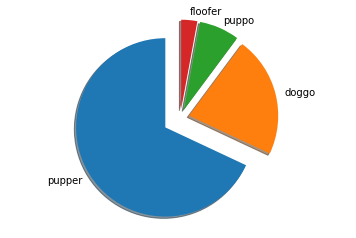

In [59]:
dog_stage_count = list(df_master[df_master['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = df_master[df_master['dog_stage'] != "None"]['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1)

figure1, axis1 = plt.subplots()
axis1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
axis1.axis('equal')

'Pupper' stage get most tweets.

### 4. Scatter plot between favorites and retweets.

Text(0.5,1,'Favorites vs Retweets Scatter plot')

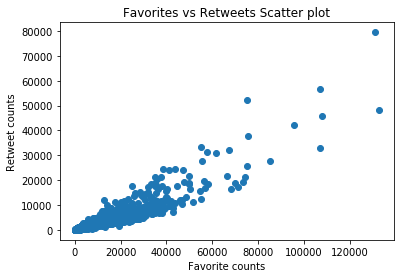

In [60]:
plt.scatter(df_master['favorite_count'], df_master['retweet_count'])
plt.xlabel('Favorite counts')
plt.ylabel('Retweet counts')
plt.title('Favorites vs Retweets Scatter plot')

There is a positive correlation between the Favorites and Retweets.

In [61]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0